# Titanic Survival Prediction

In [186]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler,StandardScaler


## Load Dataset

In [187]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [188]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']



In [189]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# train_df['Cabin'].fillna("n/a", inplace=True)
# test_df['Cabin'].fillna("n/a", inplace=True)
# train_df['Embarked'].fillna("n/a", inplace=True)
# test_df['Embarked'].fillna("n/a", inplace=True)


In [190]:
bins = [0, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Labels for the bins
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

# family size
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Young Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Young Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Young Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,Young Adult,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Young Adult,0


In [191]:
from sklearn.preprocessing import LabelEncoder
def label_encode(df, feats):
    """Label encode the dataframe for specified features."""
    le = LabelEncoder()
    dff = df[feats].apply(LabelEncoder().fit_transform)
    df[feats] = dff[feats]
    return df
train_df=label_encode(train_df,['Embarked','Sex','AgeGroup','Title'])
test_df=label_encode(test_df,['Embarked','Sex','AgeGroup','Title'])

In [192]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
AgeGroup         0
FamilySize       0
dtype: int64

In [193]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
AgeGroup         0
FamilySize       0
dtype: int64

In [194]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,12,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,13,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,9,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,13,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,12,0,0


In [195]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,5,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,6,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,5,2,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,5,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,2,5,3,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,5,0,0
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,2,5,3,0


In [196]:
categorical_features=['Sex','Pclass','Embarked']
id_features=['PassengerId','Name','Ticket','Cabin']
numerical_features=['Fare','Age','SibSp','Parch']
target_feature='Survived'

/tmp/ipykernel_42901/4052014555.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)


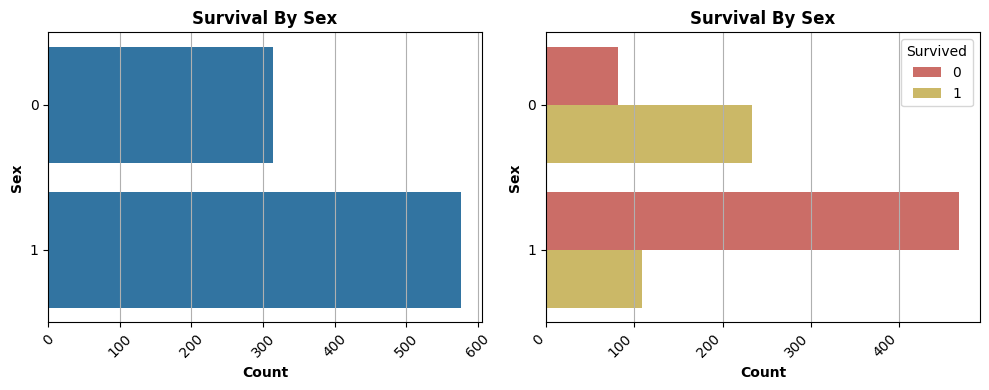

/tmp/ipykernel_42901/4052014555.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)


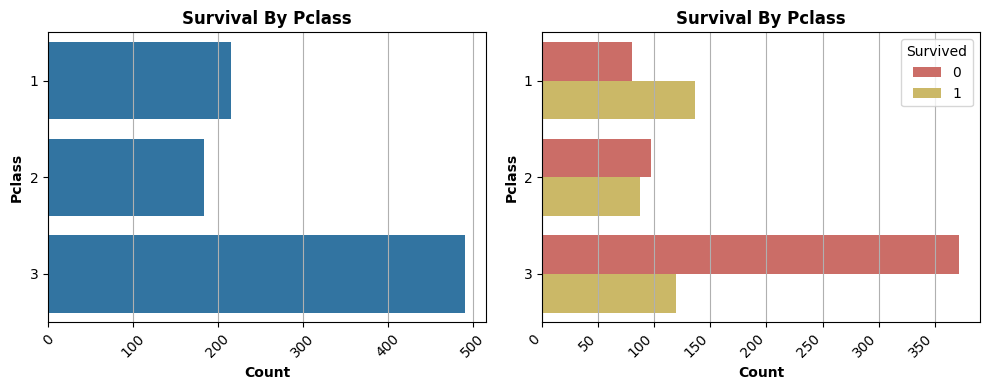

/tmp/ipykernel_42901/4052014555.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)


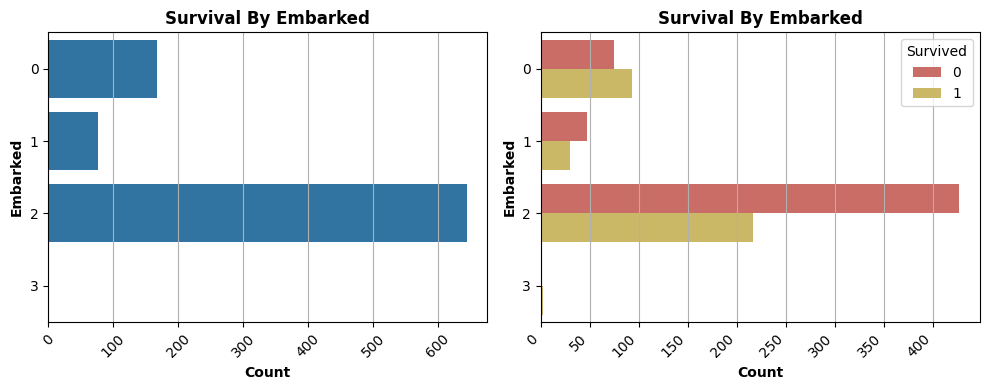

/tmp/ipykernel_42901/4052014555.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)


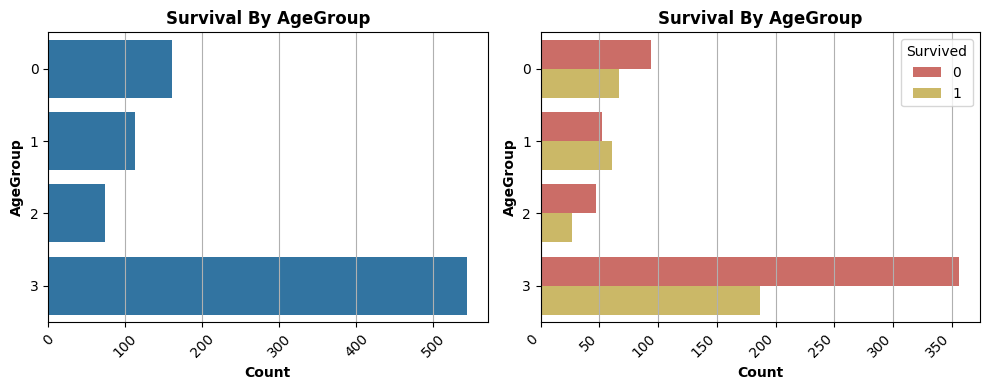

In [197]:
def plot_category(df,category,target):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    
    cmap = sns.color_palette("hls", 8)
    
    # Main bar plot
    sns.countplot(data=df, y=category, ax=axs[0])
    axs[0].set_title(f'Survival By {category}', weight='bold')
    axs[0].grid(axis='x')
    axs[0].set_ylabel(category, weight='bold')
    axs[0].set_xlabel('Count', weight='bold')

    # Bar plot with hue
    sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)
    axs[1].set_title(f'Survival By {category}', weight='bold')
    axs[1].grid(axis='x')
    axs[1].set_ylabel(category, weight='bold')
    axs[1].set_xlabel('Count', weight='bold')
    
    # Rotate labels
    for i in [0, 1]:
        for label in axs[i].get_xticklabels():
            label.set_rotation(45)

   

    fig.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
plot_category(train_df,"Sex","Survived")
plot_category(train_df,"Pclass","Survived")
plot_category(train_df,"Embarked","Survived")
plot_category(train_df,"AgeGroup","Survived")
# plot_category(train_df,"Title","Survived")

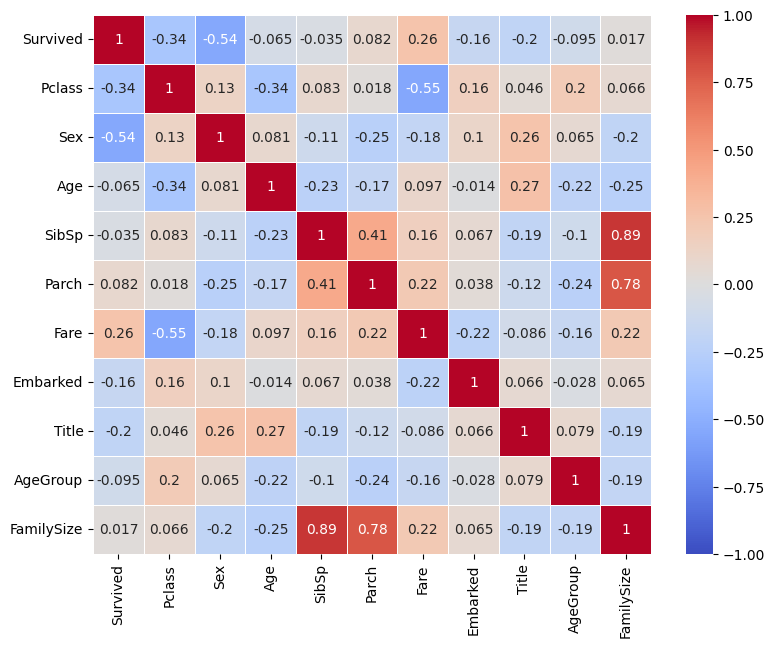

In [198]:
def one_hot_encode(df, feats):
    """One hot encode the dataframe for specified features."""
    dff = pd.get_dummies(df[feats]).astype(int)
    return df.drop(feats, axis=1).join(dff)
def plot_correlation(df):
    dff = df.drop(id_features, axis=1)
    # dff = one_hot_encode(dff, ['Embarked', 'Sex','AgeGroup'])

    
    corr = dff.select_dtypes('number').corr()
    
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    fig, axs = plt.subplots(figsize=(9,7))
    sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,annot=True, linewidth=0.5)
    plt.show()
plot_correlation(train_df)

In [199]:
formatted_train_df=train_df.drop(id_features,axis=1)
# formatted_train_df=one_hot_encode(formatted_train_df,['Embarked', 'Sex'])
# formatted_train_df=pd.get_dummies(formatted_train_df)
formatted_train_df = formatted_train_df.astype(int)

scaler = StandardScaler()
dff = pd.DataFrame()
dff[numerical_features] = scaler.fit_transform(formatted_train_df[numerical_features])
formatted_train_df.drop(numerical_features, axis=1).join(dff)
formatted_train_df.dropna(inplace=True)
formatted_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize
0,0,3,1,22,1,0,7,2,12,3,1
1,1,1,0,38,1,0,71,0,13,0,1
2,1,3,0,26,0,0,7,2,9,3,0
3,1,1,0,35,1,0,53,2,13,0,1
4,0,3,1,35,0,0,8,2,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2,15,3,0
887,1,1,0,19,0,0,30,2,9,3,0
888,0,3,0,28,1,2,23,2,9,3,3
889,1,1,1,26,0,0,30,0,12,3,0


In [200]:
corr = formatted_train_df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.064909,-0.035322,0.081629,0.257482,-0.163517,-0.201345,-0.094967,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.339999,0.083081,0.018443,-0.550553,0.157112,0.045541,0.196326,0.065997
Sex,-0.543351,0.131900,1.000000,0.080750,-0.114631,-0.245489,-0.182331,0.104057,0.256407,0.064628,-0.200988
Age,-0.064909,-0.339999,0.080750,1.000000,-0.233066,-0.172745,0.097064,-0.013674,0.272791,-0.215402,-0.245593
SibSp,-0.035322,0.083081,-0.114631,-0.233066,1.000000,0.414838,0.159506,0.066654,-0.191786,-0.102091,0.890712
Parch,0.081629,0.018443,-0.245489,-0.172745,0.414838,1.000000,0.216252,0.038322,-0.119721,-0.235567,0.783111
Fare,0.257482,-0.550553,-0.182331,0.097064,0.159506,0.216252,1.000000,-0.220645,-0.085805,-0.158889,0.217052
Embarked,-0.163517,0.157112,0.104057,-0.013674,0.066654,0.038322,-0.220645,1.000000,0.065899,-0.028449,0.064701
Title,-0.201345,0.045541,0.256407,0.272791,-0.191786,-0.119721,-0.085805,0.065899,1.000000,0.078723,-0.190890
AgeGroup,-0.094967,0.196326,0.064628,-0.215402,-0.102091,-0.235567,-0.158889,-0.028449,0.078723,1.000000,-0.187461


In [201]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


y=formatted_train_df[target_feature]
x=formatted_train_df.drop(target_feature,axis=1)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2, random_state=1337,shuffle=True)

rf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(x_train,y_train)
rfc_pred = rf.predict(x_val)
rfc_acc = accuracy_score(y_val, rfc_pred)
print(f"RF Classifier accuracy: {rfc_acc:.6f}")




RF Classifier accuracy: 0.837989


In [202]:
test_df
X_test = pd.get_dummies(test_df.drop(id_features,axis=1))
X_test
predictions = rf.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [203]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize
647,1,1,56,0,0,35,0,1,2,0
848,2,1,28,0,1,33,2,15,3,1
398,2,1,23,0,0,10,2,4,3,0
787,3,1,8,4,1,29,1,8,1,5
226,2,1,19,0,0,10,2,12,3,0
...,...,...,...,...,...,...,...,...,...,...
167,3,0,45,1,4,27,2,13,0,5
232,2,1,59,0,0,13,2,12,2,0
860,3,1,41,2,0,14,2,12,0,2
189,3,1,36,0,0,7,2,12,0,0


In [204]:
# Build a simple neural network model
import numpy as np
import tensorflow as tf
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)



model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model on the validation set
nn_pred_prob = model.predict(x_val)
nn_pred = (nn_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
nn_acc = accuracy_score(y_val, nn_pred)
print(f"Neural Network accuracy: {nn_acc:.6f}")

Epoch 1/10
23/23 [==============================] - 1s 10ms/step - loss: 1.1146 - accuracy: 0.6278 - val_loss: 0.8076 - val_accuracy: 0.6592
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.6896 - val_loss: 0.6766 - val_accuracy: 0.6369
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.6685 - val_loss: 0.7721 - val_accuracy: 0.6145
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.7177 - val_loss: 0.5970 - val_accuracy: 0.6816
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7360 - val_loss: 0.5614 - val_accuracy: 0.6983
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.7289 - val_loss: 0.5824 - val_accuracy: 0.7039
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5467 - accuracy: 0.7317 - val_loss: 0.5405 - val_accuracy: 0.7207
Epoch 8/10
23/23 [=